In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [ ]:
data = pd.read_csv('SPFD.csv')
print(data.shape)
X = data.iloc[:,:-1]
X.head()

In [5]:
Y = data.iloc[:,-1:]
Y.head()

,PF
0,1
1,0
2,1
3,1
4,0


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [5]:
classifier_liblinear_1 = LogisticRegression(C=1.0, multi_class='ovr', penalty='l2',
                   random_state=0, solver='liblinear')

In [6]:
classifier_liblinear_1.fit(X_train, Y_train.values.ravel())

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [7]:
classifier_liblinear_1.intercept_

array([1.23700497])

In [8]:
classifier_liblinear_1.coef_

array([[ 2.56879859, -0.63559626]])

In [9]:
y_pred = classifier_liblinear_1.predict(X_test)
print('Точность классификации LogisticRegression: {:.3f}'.format(classifier_liblinear_1.score(X_test, Y_test)))

Точность классификации LogisticRegression: 0.967


In [10]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       148
           1       0.94      1.00      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [11]:
classifier_liblinear_10 = LogisticRegression(C=10.0, multi_class='ovr', penalty='l2',
                   random_state=0, solver='liblinear').fit(X_train, Y_train.values.ravel())

In [12]:
classifier_liblinear_10.intercept_

array([4.62019892])

In [13]:
classifier_liblinear_10.coef_

array([[ 2.59764836, -0.7685155 ]])

In [14]:
y_pred = classifier_liblinear_10.predict(X_test)
print('Точность классификации LogisticRegression: {:.3f}'.format(classifier_liblinear_10.score(X_test, Y_test)))

Точность классификации LogisticRegression: 0.967


In [15]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       148
           1       0.94      1.00      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [16]:
classifier_newton = LogisticRegression(C=1.0, multi_class='ovr', penalty='l2',
                   random_state=0, solver='newton-cg').fit(X_train, Y_train.values.ravel())

In [17]:
classifier_newton.intercept_

array([7.71655339])

In [18]:
classifier_newton.coef_

array([[ 2.29220603, -0.80415938]])

In [19]:
y_pred = classifier_newton.predict(X_test)
print('Точность классификации LogisticRegression: {:.3f}'.format(classifier_newton.score(X_test, Y_test)))

Точность классификации LogisticRegression: 0.967


In [20]:
classifier_saga = LogisticRegression(C=10.0, multi_class='multinomial', penalty='l1',
                   random_state=0, solver='saga', max_iter=300)

In [21]:
classifier_saga.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=10.0, max_iter=300, multi_class='multinomial',
                   penalty='l1', random_state=0, solver='saga')

In [22]:
classifier_saga.intercept_

array([0.3089327])

In [23]:
classifier_saga.coef_

array([[ 1.41035627, -0.33792712]])

In [24]:
y_pred_1 = classifier_saga.predict(X_test)

In [25]:
print('Точность классификации LogisticRegression: {:.3f}'.format(classifier_saga.score(X_test, Y_test)))

Точность классификации LogisticRegression: 0.977


In [26]:
print(classification_report(Y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       148
           1       0.96      1.00      0.98       152

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [11]:
svm_model = svm.SVC(kernel='linear')

In [12]:
svm_model.fit(X_train, Y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=5000)

In [70]:
y_train_predict = cross_val_predict(svm_model, X_train, Y_train.values.ravel())

In [71]:
y_predict = svm_model.predict(X_test)

In [72]:
print('Точность классификации svm: {:.3f}'.format(svm_model.score(X_test, Y_test)))

Точность классификации svm: 0.967


In [73]:
print(confusion_matrix(Y_test, y_predict))

[[138  10]
 [  0 152]]


In [74]:
print(precision_score(Y_test, y_predict))
print(recall_score(Y_test, y_predict))

0.9382716049382716
1.0


In [1]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predict)

NameError: name 'roc_curve' is not defined

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [fpr, tpf], [0, 1], 'k--') # dashed diagonal
     plt.xlabel('False Positive Rate, FPR (1 - specificity)')
     plt.ylabel('True Positive Rate, TPR (Recall)')
     plt.title('ROC curve')
     # plt.savefig("ROC.png")

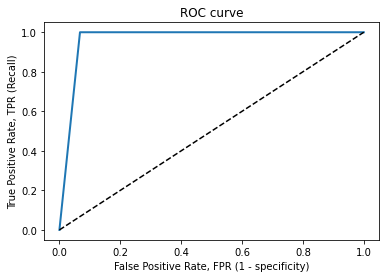

In [77]:
plot_roc_curve(fpr, tpr)
plt.show()